## DIGITS Decision Tree

In [1]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
%matplotlib inline   

# Load digits dataset from scikit
digits = ds.load_digits()
# Separate data from labels
X = digits.data
y = digits.target
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

### Train Naive Bayes to compare results

In [2]:
from sklearn.naive_bayes import GaussianNB  # For numerical featuresm assuming normal distribution
from sklearn.naive_bayes import MultinomialNB  # For features with counting numbers (f.i. hown many times word appears in doc)
from sklearn.naive_bayes import BernoulliNB  # For binari features (f.i. word appears or not in document)
from sklearn.metrics import confusion_matrix
# interval confidence
from statsmodels.stats.proportion import proportion_confint
# No parameters to tune

clf = GaussianNB()
pred = clf.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')


[[54  1  0  0  3  0  0  1  0  0]
 [ 0 42  1  0  0  0  0  0  6  0]
 [ 0  5 32  0  0  0  0  0 12  0]
 [ 0  2  2 51  0  1  0  3  5  0]
 [ 1  4  0  0 54  0  0  1  1  0]
 [ 0  2  0  1  0 41  0  2  1  0]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  0]
 [ 0 10  0  1  0  0  0  1 34  0]
 [ 0  2  0  1  2  3  1  7  8 33]]

Accuracy: 0.831481481481

             precision    recall  f1-score   support

          0       0.98      0.92      0.95        59
          1       0.62      0.86      0.72        49
          2       0.91      0.65      0.76        49
          3       0.94      0.80      0.86        64
          4       0.92      0.89      0.90        61
          5       0.91      0.87      0.89        47
          6       0.98      1.00      0.99        51
          7       0.79      1.00      0.88        57
          8       0.51      0.74      0.60        46
          9       1.00      0.58      0.73        57

avg / total       0.87      0.83      0.83       540



(0.7973917698694923, 0.861327901247561)

### Train and Print A Decision Tree

In [3]:
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image  

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

0.857407407407
[[54  0  1  0  1  1  1  0  1  0]
 [ 0 45  2  0  2  0  0  0  0  0]
 [ 0  0 42  2  0  0  2  1  2  0]
 [ 0  1  1 50  0  0  0  2  2  8]
 [ 0  2  0  0 52  1  3  0  2  1]
 [ 0  0  0  0  0 44  0  0  0  3]
 [ 0  0  0  0  4  0 47  0  0  0]
 [ 0  3  0  1  0  0  0 52  1  0]
 [ 0  1  2  0  1  3  0  0 37  2]
 [ 0  2  2  4  2  5  0  1  1 40]]

Accuracy: 0.857407407407

             precision    recall  f1-score   support

          0       1.00      0.92      0.96        59
          1       0.83      0.92      0.87        49
          2       0.84      0.86      0.85        49
          3       0.88      0.78      0.83        64
          4       0.84      0.85      0.85        61
          5       0.81      0.94      0.87        47
          6       0.89      0.92      0.90        51
          7       0.93      0.91      0.92        57
          8       0.80      0.80      0.80        46
          9       0.74      0.70      0.72        57

avg / total       0.86      0.86      0.86

(0.8251872429666943, 0.885095302675052)

In [5]:
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image  

0.862962962963
[[55  0  0  0  2  1  0  0  0  1]
 [ 0 37  1  3  1  0  0  1  4  2]
 [ 0  1 38  0  2  0  2  0  6  0]
 [ 0  1  3 54  0  1  0  0  1  4]
 [ 1  2  2  0 50  2  2  0  1  1]
 [ 0  0  1  0  1 44  0  0  0  1]
 [ 0  0  0  0  3  0 46  2  0  0]
 [ 0  0  0  0  2  0  0 54  0  1]
 [ 0  1  0  3  1  1  2  1 36  1]
 [ 1  1  0  1  0  1  1  0  0 52]]

Accuracy: 0.862962962963

             precision    recall  f1-score   support

          0       0.96      0.93      0.95        59
          1       0.86      0.76      0.80        49
          2       0.84      0.78      0.81        49
          3       0.89      0.84      0.86        64
          4       0.81      0.82      0.81        61
          5       0.88      0.94      0.91        47
          6       0.87      0.90      0.88        51
          7       0.93      0.95      0.94        57
          8       0.75      0.78      0.77        46
          9       0.83      0.91      0.87        57

avg / total       0.86      0.86      0.86

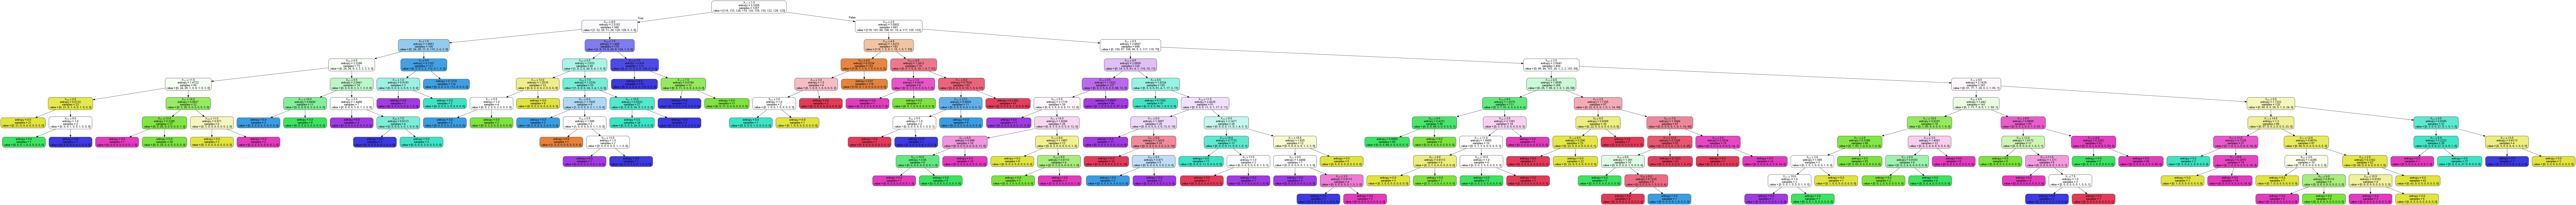

In [6]:
clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2,min_impurity_split=0.2)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confudence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,    
                         filled=True, rounded=True, 
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
graph[0].write_png('DT1.png')
Image(graph[0].create_png())  

In [22]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_split': list(np.linspace(0,1,21)),'min_samples_split':list(range(2,102,11))}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)
    

Best Params= {'min_samples_split': 2, 'min_impurity_split': 0.15000000000000002} Accuracy= 0.861575178998


In [10]:
clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2,min_impurity_split=0.2)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

0.87037037037
[[55  0  0  0  3  1  0  0  0  0]
 [ 0 37  0  2  1  0  0  1  6  2]
 [ 0  1 42  0  0  0  2  0  4  0]
 [ 0  1  2 55  0  2  1  0  1  2]
 [ 0  2  2  0 50  2  3  0  1  1]
 [ 0  0  0  0  2 44  0  0  0  1]
 [ 2  0  0  0  3  0 46  0  0  0]
 [ 0  0  0  0  2  0  0 54  0  1]
 [ 0  1  0  4  0  1  2  2 35  1]
 [ 1  0  1  2  0  1  0  0  0 52]]

Accuracy: 0.87037037037

             precision    recall  f1-score   support

          0       0.95      0.93      0.94        59
          1       0.88      0.76      0.81        49
          2       0.89      0.86      0.88        49
          3       0.87      0.86      0.87        64
          4       0.82      0.82      0.82        61
          5       0.86      0.94      0.90        47
          6       0.85      0.90      0.88        51
          7       0.95      0.95      0.95        57
          8       0.74      0.76      0.75        46
          9       0.87      0.91      0.89        57

avg / total       0.87      0.87      0.87  

(0.8390910339307714, 0.8965208305002829)

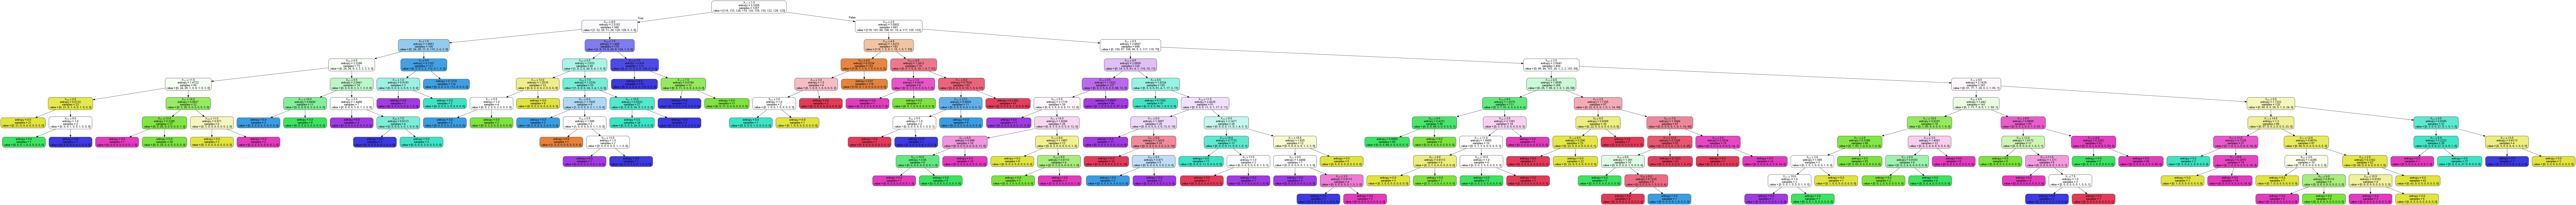

In [7]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,    
                         filled=True, rounded=True, 
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
graph[0].write_png('DT2.png')
Image(graph[0].create_png())  
